In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
import pickle
heart_data =  pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
Column Description 

age - age in years 
sex - (1 = male; 0 = female) 
cp - chest pain type 
trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
chol - serum cholestoral in mg/dl 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg - resting electrocardiographic results 
thalach - maximum heart rate achieved 
exang - exercise induced angina (1 = yes; 0 = no) 
oldpeak - ST depression induced by exercise relative to rest 
slope - the slope of the peak exercise ST segment 
ca - number of major vessels (0-3) colored by flourosopy 
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
target - have disease or not (1=yes, 0=no)

In [2]:
#Basic data information
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Let's check the shape of the data

print("(row, columns)",heart_data.shape)

(row, columns) (303, 14)


In [6]:
#Let's check the unique value of each feature
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [3]:
#Let's look at the descriptive statistics of the dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:

# Any missing values
heart_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
# Any balance between positive and negative predictions?
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
#Let's check feature correlation 

corr = heart_data.corr()

In [8]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [9]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


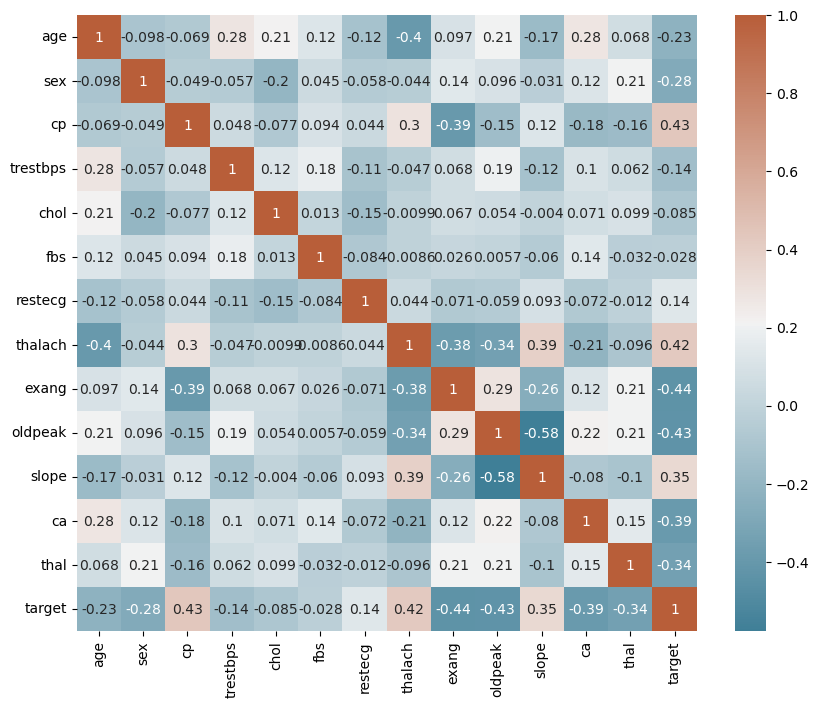

In [11]:
plt.subplots(figsize=(10,8))

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True,
            cmap=sns.diverging_palette(225, 25, as_cmap=True))
plt.show()

In [12]:
#Get features and labels
X = heart_data.drop(columns='target')
y = heart_data['target']

In [13]:
#Train-Test dataset split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [14]:
#Let's normalise / scale the feature sets

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbour Algorithm

In [15]:
#Let's use the features to train KNN algorithm
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.90


In [16]:
y_pred = knn.predict(X_test)

In [17]:
#What's the classification accuracy of the model?    
accuracy_score(y_test, y_pred)

0.9016393442622951

In [ ]:
# Let's use cross validation technique to evaluate our model

In [25]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")

In [26]:
#Print the accuracy for each value of CV
scores

array([0.72      , 0.76      , 0.75      , 0.75      , 0.91666667,
       0.79166667, 0.83333333, 0.79166667, 0.75      , 0.875     ])

In [27]:
#Compute the mean accuracy
scores.mean()

0.7938333333333333

In [21]:
#We can persist our model for use elsewhere....in an application for example.
model = pickle.dumps(knn)# This persists the knn model

In [24]:
s_model = pickle.loads(model)

In [25]:
pred = s_model.predict(X_test)#predicts the class using the test data
pred[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

# Let's use Logistic Regression

In [19]:
logis =  LogisticRegression()

In [31]:
logmodel = logis.fit(X_train, y_train)

In [ ]:
# Let's evaluate the model

In [32]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logmodel.score(X_train, y_train)))# What is being evaluated here?
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))# And here?

Accuracy of Logistic Regression classifier on training set: 0.83
Accuracy of Logistic Regression classifier on test set: 0.84


In [33]:
#What's the classification accuracy of the model?
#using accuracy_score
accuracy_score(y_test, y_pred, normalize = True)

0.9016393442622951

In [24]:
log_pred = logmodel.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9016393442622951

In [26]:
y_pred[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

# KNN

In [34]:
#Get the unique values of labels
target = y.unique()
target

array([1, 0])

In [35]:
#Let's use the features to train KNN algorithm
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
#Generate predicted labels
knn_pred = knn.predict(X_test)

In [37]:
#Evaluate using cross validation setting CV = 10. The CV can be tuned.
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring ='accuracy')

In [38]:
#Print the accuracy scores
scores

array([0.72      , 0.76      , 0.75      , 0.75      , 0.91666667,
       0.79166667, 0.83333333, 0.79166667, 0.75      , 0.875     ])

In [39]:
# Compute the mean accuracy
scores.mean()

0.7938333333333333

In [40]:
#Generate the classification report showing the Precision, Recall and F-Score
print(classification_report(y_test, knn_pred, labels = target))

              precision    recall  f1-score   support

           1       0.87      0.97      0.92        34
           0       0.96      0.81      0.88        27

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [33]:
# KNN's Confusion Matrix

In [34]:
knn_conf_mx = confusion_matrix(y_test,knn_pred, labels = target)

In [35]:
knn_conf_mx

array([[33,  1],
       [ 5, 22]])

In [29]:
#Let's normalize the matrix
nor_knn_conf_mx = confusion_matrix(y_test,knn_pred,normalize='true', labels = target)

In [30]:
print(knn_conf_mx)

[[0.97058824 0.02941176]
 [0.18518519 0.81481481]]


Text(6.0, 0.5, 'Actual')

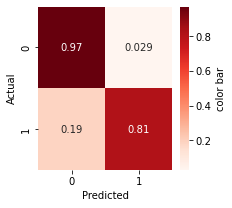

In [31]:
# Let's plot the confusion matrix using heatmap

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(knn_conf_mx, cmap="Reds", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Using SVM

In [37]:
#You can tune the regularization parameter(C) of SVC
svc = SVC(C=3)

In [38]:
svc_model = svc.fit(X_train, y_train)

In [39]:
svc_pred = svc_model.predict(X_test)

In [40]:
svc_pred[:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [41]:
#Generate the classification report showing the Precision, Recall and F-Score
print(classification_report(y_test, svc_pred, labels = target))

              precision    recall  f1-score   support

           1       0.86      0.94      0.90        34
           0       0.92      0.81      0.86        27

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



# Confusion Matrix

In [42]:
svc_conf_mx = confusion_matrix(y_test,svc_pred, labels = target)

In [43]:
print(svc_conf_mx)

[[32  2]
 [ 5 22]]


In [129]:

#Nomralized Matrix
nor_svc_conf_mx = confusion_matrix(y_test,svc_pred,normalize='true', labels = target)

In [130]:
print(nor_svc_conf_mx)

[[0.94117647 0.05882353]
 [0.18518519 0.81481481]]


Text(6.0, 0.5, 'Actual')

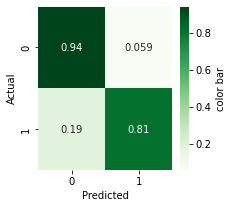

In [131]:
# Let's plot the confusion matrix using heatmap

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(svc_conf_mx, cmap="Greens", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [43]:
# Using Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

In [74]:
mlp = MLPClassifier(random_state=1, max_iter = 200)

In [75]:
mlp_model = mlp.fit(X_train, y_train)

/Users/dr.abayomiotebolaku/Anaconda/anaconda3/envs/MLAH/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
mlp_pred = mlp_model.predict(X_test)

In [77]:
#Generate the classification report showing the Precision, Recall and F-Score
print(classification_report(y_test, mlp_pred, labels = target))

              precision    recall  f1-score   support

           1       0.84      0.91      0.87        34
           0       0.88      0.78      0.82        27

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [78]:
mlp_conf_mx = confusion_matrix(y_test,mlp_pred, labels = target)

In [79]:
print(mlp_conf_mx)

[[31  3]
 [ 6 21]]


In [82]:
mlp_conf_mx = confusion_matrix(y_test,mlp_pred, labels = target, normalize = 'true')

In [83]:
print(mlp_conf_mx)

[[0.91176471 0.08823529]
 [0.22222222 0.77777778]]


Text(8.222222222222223, 0.5, 'Actual')

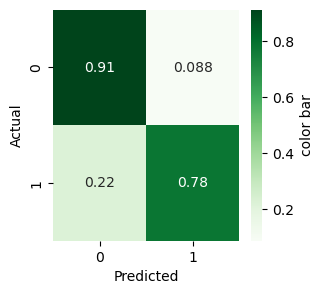

In [85]:
#Let's plot the confusion matrix using heatmap

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(mlp_conf_mx, cmap="Greens", annot = True, cbar_kws={"orientation":"vertical","label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")